### Exploratory Data Analysis 
- In Notebook We are going to analyse the jobs that we have collected in LinkedIn and see which jobs keep repeating to later be able to drop it and also observe which jobs are on demand for this season 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# WE are going to load up our dataset so we can Visualize 
df = pd.read_csv(r"/Users/alex/Desktop/The Knowledge House/Capstone_Project/Code/job_list.csv")
df

,job_title,company_name,time_posted,num_applicants,employment_type,salary
0,"Data Scientist, Small Business Group",Meta,1 day ago,77 applicants,Not Applicable,"Base pay range\n\n $134,000.00/yr - $204,..."
1,Junior Data Scientist,Team Remotely Inc,1 day ago,100 applicants,Entry level,NaN
2,ML Engineer-AI/ML,Zortech Solutions,1 day ago,49 applicants,Entry level,NaN
3,"Data Scientist, Analytics",DoorDash,NaN,NaN,Entry level,"Base pay range\n\n $133,000.00/yr - $243,..."
4,Junior Data Scientist,LTIMindtree,NaN,NaN,Entry level,NaN
...,...,...,...,...,...,...
344,Business Systems Analyst,Vernovis,NaN,78 applicants,Mid-Senior level,"Base pay range\n\n $110,000.00/yr - $115,..."
345,Data and Analytics Specialist,UBS,6 days ago,NaN,Not Applicable,NaN
346,Are you a Document Administrator looking for c...,eStaffing Inc.,3 weeks ago,NaN,Entry level,Base pay range\n\n $40.00/hr - $60.00/hr
347,Digital Associate,PLUS Communications,2 days ago,NaN,Associate,NaN


In [3]:
# We are going to rename our Columns so it can look better
new_names = ['Title', 'Company', 'Posted', 'Applicants', 'Type', 'Salary']
for i in range(len(new_names)):
    df = df.rename(columns={df.columns[i]: new_names[i]})
df

,Title,Company,Posted,Applicants,Type,Salary
0,"Data Scientist, Small Business Group",Meta,1 day ago,77 applicants,Not Applicable,"Base pay range\n\n $134,000.00/yr - $204,..."
1,Junior Data Scientist,Team Remotely Inc,1 day ago,100 applicants,Entry level,NaN
2,ML Engineer-AI/ML,Zortech Solutions,1 day ago,49 applicants,Entry level,NaN
3,"Data Scientist, Analytics",DoorDash,NaN,NaN,Entry level,"Base pay range\n\n $133,000.00/yr - $243,..."
4,Junior Data Scientist,LTIMindtree,NaN,NaN,Entry level,NaN
...,...,...,...,...,...,...
344,Business Systems Analyst,Vernovis,NaN,78 applicants,Mid-Senior level,"Base pay range\n\n $110,000.00/yr - $115,..."
345,Data and Analytics Specialist,UBS,6 days ago,NaN,Not Applicable,NaN
346,Are you a Document Administrator looking for c...,eStaffing Inc.,3 weeks ago,NaN,Entry level,Base pay range\n\n $40.00/hr - $60.00/hr
347,Digital Associate,PLUS Communications,2 days ago,NaN,Associate,NaN


In [4]:
# We are checking if there are any duplicates in our dateset
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
df

,Title,Company,Posted,Applicants,Type,Salary
0,"Data Scientist, Small Business Group",Meta,1 day ago,77 applicants,Not Applicable,"Base pay range\n\n $134,000.00/yr - $204,..."
1,Junior Data Scientist,Team Remotely Inc,1 day ago,100 applicants,Entry level,NaN
2,ML Engineer-AI/ML,Zortech Solutions,1 day ago,49 applicants,Entry level,NaN
3,"Data Scientist, Analytics",DoorDash,NaN,NaN,Entry level,"Base pay range\n\n $133,000.00/yr - $243,..."
4,Junior Data Scientist,LTIMindtree,NaN,NaN,Entry level,NaN
...,...,...,...,...,...,...
286,Data Analyst / Data Analytics Associate,Verdant Infotech Solutions,4 days ago,73 applicants,Entry level,NaN
287,Data Scientist,Actalent,4 days ago,93 applicants,Entry level,NaN
288,Business Systems Analyst,Vernovis,NaN,78 applicants,Mid-Senior level,"Base pay range\n\n $110,000.00/yr - $115,..."
289,Data and Analytics Specialist,UBS,6 days ago,NaN,Not Applicable,NaN


In [5]:
# We keep getting an error so we created a copy so we can replace rename some of our rows on the Column Applicants
df = df.copy()
df["Applicants"] = df["Applicants"].str.replace("applicants", "")
df

,Title,Company,Posted,Applicants,Type,Salary
0,"Data Scientist, Small Business Group",Meta,1 day ago,77,Not Applicable,"Base pay range\n\n $134,000.00/yr - $204,..."
1,Junior Data Scientist,Team Remotely Inc,1 day ago,100,Entry level,NaN
2,ML Engineer-AI/ML,Zortech Solutions,1 day ago,49,Entry level,NaN
3,"Data Scientist, Analytics",DoorDash,NaN,NaN,Entry level,"Base pay range\n\n $133,000.00/yr - $243,..."
4,Junior Data Scientist,LTIMindtree,NaN,NaN,Entry level,NaN
...,...,...,...,...,...,...
286,Data Analyst / Data Analytics Associate,Verdant Infotech Solutions,4 days ago,73,Entry level,NaN
287,Data Scientist,Actalent,4 days ago,93,Entry level,NaN
288,Business Systems Analyst,Vernovis,NaN,78,Mid-Senior level,"Base pay range\n\n $110,000.00/yr - $115,..."
289,Data and Analytics Specialist,UBS,6 days ago,NaN,Not Applicable,NaN


In [6]:
# We are going to extract The yearly and hourly seperate so we can just have numbers 
df['Period'] = df['Salary'].str.extract(r'(/yr|/hr)')

df

,Title,Company,Posted,Applicants,Type,Salary,Period
0,"Data Scientist, Small Business Group",Meta,1 day ago,77,Not Applicable,"Base pay range\n\n $134,000.00/yr - $204,...",/yr
1,Junior Data Scientist,Team Remotely Inc,1 day ago,100,Entry level,NaN,NaN
2,ML Engineer-AI/ML,Zortech Solutions,1 day ago,49,Entry level,NaN,NaN
3,"Data Scientist, Analytics",DoorDash,NaN,NaN,Entry level,"Base pay range\n\n $133,000.00/yr - $243,...",/yr
4,Junior Data Scientist,LTIMindtree,NaN,NaN,Entry level,NaN,NaN
...,...,...,...,...,...,...,...
286,Data Analyst / Data Analytics Associate,Verdant Infotech Solutions,4 days ago,73,Entry level,NaN,NaN
287,Data Scientist,Actalent,4 days ago,93,Entry level,NaN,NaN
288,Business Systems Analyst,Vernovis,NaN,78,Mid-Senior level,"Base pay range\n\n $110,000.00/yr - $115,...",/yr
289,Data and Analytics Specialist,UBS,6 days ago,NaN,Not Applicable,NaN,NaN


In [7]:
# We are fixing the Column of salaries so we can use the information later
df["Salary"] = df["Salary"].str.replace("$","")
df["Salary"] = df["Salary"].str.replace("\n","")
df["Salary"] = df["Salary"].str.replace(",","")
df["Salary"] = df["Salary"].str.replace("Base pay range", "")
df["Salary"] = df["Salary"].str.replace("/yr", "")
df["Salary"] = df["Salary"].str.replace("/hr", "")
df

,Title,Company,Posted,Applicants,Type,Salary,Period
0,"Data Scientist, Small Business Group",Meta,1 day ago,77,Not Applicable,134000.00 - 204000.00,/yr
1,Junior Data Scientist,Team Remotely Inc,1 day ago,100,Entry level,NaN,NaN
2,ML Engineer-AI/ML,Zortech Solutions,1 day ago,49,Entry level,NaN,NaN
3,"Data Scientist, Analytics",DoorDash,NaN,NaN,Entry level,133000.00 - 243000.00,/yr
4,Junior Data Scientist,LTIMindtree,NaN,NaN,Entry level,NaN,NaN
...,...,...,...,...,...,...,...
286,Data Analyst / Data Analytics Associate,Verdant Infotech Solutions,4 days ago,73,Entry level,NaN,NaN
287,Data Scientist,Actalent,4 days ago,93,Entry level,NaN,NaN
288,Business Systems Analyst,Vernovis,NaN,78,Mid-Senior level,110000.00 - 115000.00,/yr
289,Data and Analytics Specialist,UBS,6 days ago,NaN,Not Applicable,NaN,NaN


In [8]:
# We are going to create a function that will help us in finding the average of the salary 
def split_sal(i):
    try:
        i = i.strip().replace(' - ', '—')
        splt = i.split('—', 1)
        first = float(splt[0])
        second = float(splt[1])
        return (first + second) / 2
    except:
        return float(i)

df['Salary'] = df['Salary'].apply(split_sal)
df

,Title,Company,Posted,Applicants,Type,Salary,Period
0,"Data Scientist, Small Business Group",Meta,1 day ago,77,Not Applicable,169000.0,/yr
1,Junior Data Scientist,Team Remotely Inc,1 day ago,100,Entry level,NaN,NaN
2,ML Engineer-AI/ML,Zortech Solutions,1 day ago,49,Entry level,NaN,NaN
3,"Data Scientist, Analytics",DoorDash,NaN,NaN,Entry level,188000.0,/yr
4,Junior Data Scientist,LTIMindtree,NaN,NaN,Entry level,NaN,NaN
...,...,...,...,...,...,...,...
286,Data Analyst / Data Analytics Associate,Verdant Infotech Solutions,4 days ago,73,Entry level,NaN,NaN
287,Data Scientist,Actalent,4 days ago,93,Entry level,NaN,NaN
288,Business Systems Analyst,Vernovis,NaN,78,Mid-Senior level,112500.0,/yr
289,Data and Analytics Specialist,UBS,6 days ago,NaN,Not Applicable,NaN,NaN


In [9]:
df[["Salary", "Period"]].head(10)

,Salary,Period
0,169000.0,/yr
1,NaN,NaN
2,NaN,NaN
3,188000.0,/yr
4,NaN,NaN
5,NaN,NaN
6,110000.0,/yr
7,NaN,NaN
8,62500.0,/yr
9,94976.5,/yr


In [10]:
# We are going to be able to see how much a hourly payment will look when we get it yearly
df.loc[df['Period'] == '/hr', 'Salary'] = df.loc[df['Period'] == '/hr', 'Salary'] * 2080
df["Period"] = df["Period"].str.replace("/hr","/yr")
df

,Title,Company,Posted,Applicants,Type,Salary,Period
0,"Data Scientist, Small Business Group",Meta,1 day ago,77,Not Applicable,169000.0,/yr
1,Junior Data Scientist,Team Remotely Inc,1 day ago,100,Entry level,NaN,NaN
2,ML Engineer-AI/ML,Zortech Solutions,1 day ago,49,Entry level,NaN,NaN
3,"Data Scientist, Analytics",DoorDash,NaN,NaN,Entry level,188000.0,/yr
4,Junior Data Scientist,LTIMindtree,NaN,NaN,Entry level,NaN,NaN
...,...,...,...,...,...,...,...
286,Data Analyst / Data Analytics Associate,Verdant Infotech Solutions,4 days ago,73,Entry level,NaN,NaN
287,Data Scientist,Actalent,4 days ago,93,Entry level,NaN,NaN
288,Business Systems Analyst,Vernovis,NaN,78,Mid-Senior level,112500.0,/yr
289,Data and Analytics Specialist,UBS,6 days ago,NaN,Not Applicable,NaN,NaN


In [11]:
df['Period'] = df['Period'].replace('/yr', 'yearly')
df

,Title,Company,Posted,Applicants,Type,Salary,Period
0,"Data Scientist, Small Business Group",Meta,1 day ago,77,Not Applicable,169000.0,yearly
1,Junior Data Scientist,Team Remotely Inc,1 day ago,100,Entry level,NaN,NaN
2,ML Engineer-AI/ML,Zortech Solutions,1 day ago,49,Entry level,NaN,NaN
3,"Data Scientist, Analytics",DoorDash,NaN,NaN,Entry level,188000.0,yearly
4,Junior Data Scientist,LTIMindtree,NaN,NaN,Entry level,NaN,NaN
...,...,...,...,...,...,...,...
286,Data Analyst / Data Analytics Associate,Verdant Infotech Solutions,4 days ago,73,Entry level,NaN,NaN
287,Data Scientist,Actalent,4 days ago,93,Entry level,NaN,NaN
288,Business Systems Analyst,Vernovis,NaN,78,Mid-Senior level,112500.0,yearly
289,Data and Analytics Specialist,UBS,6 days ago,NaN,Not Applicable,NaN,NaN


In [12]:
df['Title'] = df['Title'].str.lower()
df['Data Science'] = df['Title'].str.contains('data science')|df['Title'].str.contains('data scientist')
df['Machine Learning'] = df['Title'].str.contains('machine learning')|df['Title'].str.contains('ml')|df['Title'].str.contains('ai')
df["Data Analyst"] = df['Title'].str.contains('data analyst')|df['Title'].str.contains('data analist')|df['Title'].str.contains('data analysis')|df['Title'].str.contains('data analytics')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             290 non-null    object 
 1   Company           290 non-null    object 
 2   Posted            184 non-null    object 
 3   Applicants        162 non-null    object 
 4   Type              290 non-null    object 
 5   Salary            99 non-null     float64
 6   Period            99 non-null     object 
 7   Data Science      291 non-null    bool   
 8   Machine Learning  291 non-null    bool   
 9   Data Analyst      291 non-null    bool   
dtypes: bool(3), float64(1), object(6)
memory usage: 16.9+ KB


In [14]:
df.isnull().sum()

Title                 1
Company               1
Posted              107
Applicants          129
Type                  1
Salary              192
Period              192
Data Science          0
Machine Learning      0
Data Analyst          0
dtype: int64

In [15]:
df = df.dropna(subset=['Title', "Company"])
df.isnull().sum()


Title                 0
Company               0
Posted              106
Applicants          128
Type                  0
Salary              191
Period              191
Data Science          0
Machine Learning      0
Data Analyst          0
dtype: int64

In [16]:
df['Salary'].value_counts

<bound method IndexOpsMixin.value_counts of 0      169000.0
1           NaN
2           NaN
3      188000.0
4           NaN
         ...   
286         NaN
287         NaN
288    112500.0
289         NaN
290    104000.0
Name: Salary, Length: 290, dtype: float64>

In [17]:
df['Title'].nunique


<bound method IndexOpsMixin.nunique of 0                   data scientist, small business group
1                                  junior data scientist
2                                      ml engineer-ai/ml
3                              data scientist, analytics
4                                  junior data scientist
                             ...                        
286              data analyst / data analytics associate
287                                       data scientist
288                             business systems analyst
289                        data and analytics specialist
290    are you a document administrator looking for c...
Name: Title, Length: 290, dtype: object>

In [18]:
df['Company'].value_counts()


Company
Microsoft               10
Unreal Staffing, Inc     6
SynergisticIT            6
Steneral Consulting      5
Gunderson Dettmer        4
                        ..
Georgia IT, Inc.         1
EXPENTOR                 1
C2R Ventures             1
Avispa                   1
UBS                      1
Name: count, Length: 226, dtype: int64

In [19]:
df['Type'].value_counts()

Type
Mid-Senior level    102
Entry level          92
Not Applicable       42
Associate            32
Director             13
Internship            9
Name: count, dtype: int64

In [20]:
df["Type"].nunique()

6

In [21]:
df

,Title,Company,Posted,Applicants,Type,Salary,Period,Data Science,Machine Learning,Data Analyst
0,"data scientist, small business group",Meta,1 day ago,77,Not Applicable,169000.0,yearly,True,False,False
1,junior data scientist,Team Remotely Inc,1 day ago,100,Entry level,NaN,NaN,True,False,False
2,ml engineer-ai/ml,Zortech Solutions,1 day ago,49,Entry level,NaN,NaN,False,True,False
3,"data scientist, analytics",DoorDash,NaN,NaN,Entry level,188000.0,yearly,True,False,False
4,junior data scientist,LTIMindtree,NaN,NaN,Entry level,NaN,NaN,True,False,False
...,...,...,...,...,...,...,...,...,...,...
286,data analyst / data analytics associate,Verdant Infotech Solutions,4 days ago,73,Entry level,NaN,NaN,False,False,True
287,data scientist,Actalent,4 days ago,93,Entry level,NaN,NaN,True,False,False
288,business systems analyst,Vernovis,NaN,78,Mid-Senior level,112500.0,yearly,False,False,False
289,data and analytics specialist,UBS,6 days ago,NaN,Not Applicable,NaN,NaN,False,False,False


### Univariant



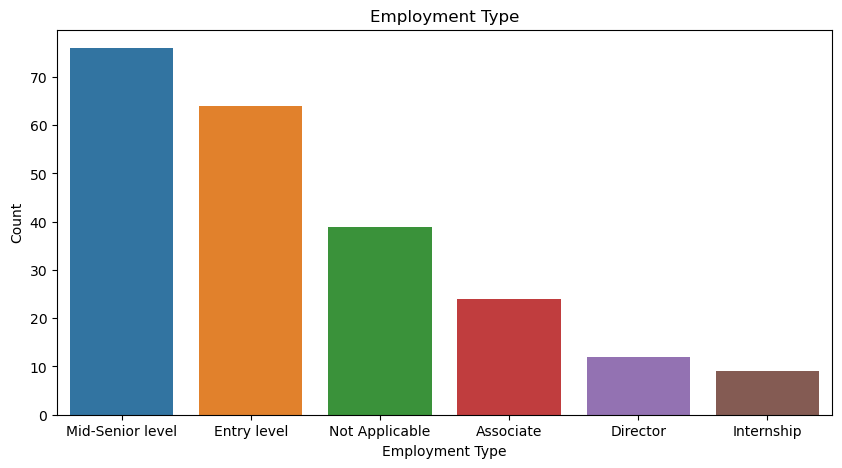

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Type', data=df, order = df['Type'].value_counts().index)
plt.title('Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()

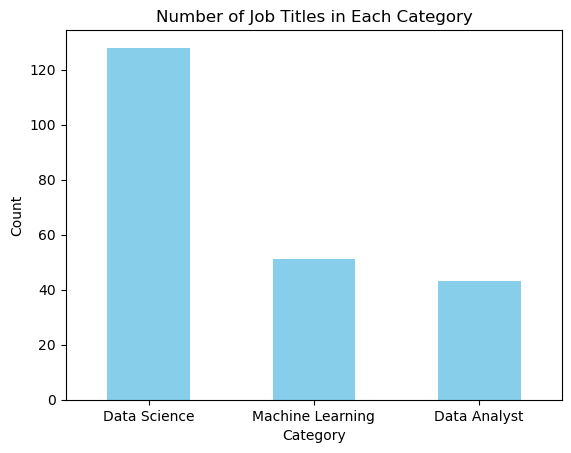

In [23]:
# Count the number of job titles in each category
categories = ['Data Science', 'Machine Learning', 'Data Analyst']
category_counts = df[categories].sum()

# Plot the counts
category_counts.plot(kind='bar', color='skyblue',rot=0)
plt.title('Number of Job Titles in Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

There are some companies that are not really companies and they are just like hiring firms so we are going to look for them and delete them from our dataset so we do not get duplicates and also we do not get any non wanted cluster
- When looking at our data set and making more ressearch we can see that almost half of the companies that are being provided in this data set are either Hiring firms and also 2 or 3 are companies that are a scam and should be remove immediently to prevent any conclusion and false analysis
we are going to drop the following companies
- Unreal staffing for being a recrutier site
- synergisticit also recrutier site
- steneral consulting(recrutier site)
- jobot hiring firm but using AI
- estaffing inc for being a hiring firm
-  hiremefast (this is a scam)
- getmarlee.com (hiring firm).. etc


In [24]:
selected = ["Team Remotely Inc","Beacon Hill","Actalent","Vernovis","Verdant Infotech Solutions","Confidential","Pyramid Consulting, Inc","Greene Resources","W Talent", "Zortech Solutions", "LTIMindtree", "Unreal Staffing, Inc", "SynergisticIT", "Steneral Consulting", "Jobot","eStaffing Inc.", "HireMeFast LLC","Marlee (Fingerprint For Success)","Patterned Learning Career","eXcell, a division of Compucom Systems", "Akkodis","Phoenix Recruitment","Revival Talent Solutions","STOITECH Executive Search and Placement","Coders Data","Insight Global","Selby Jennings","Randstad USA","AMRU Screening Services","Jobs for Humanity"]
df = df[~df['Company'].isin(selected)]
df["Company"].unique()

array(['Meta', 'DoorDash', 'Walgreens', 'EVONA', 'ActiGraph',
       'NASA - National Aeronautics and Space Administration', 'Visa',
       'Relate Central - IT & Cybersecurity Solutions',
       'Xcellent Technology Solutions (XTS)', 'Carrot Fertility', 'Aura',
       'HP', 'Travelers', 'Johnson & Johnson', 'ATPCO', 'nurdsoft',
       'Lenovo', 'Pinterest', 'eTek IT Services, Inc.', 'Microsoft',
       'Gerdau Corsa', 'Amgen Italia', 'Trace3', 'Technology Ventures',
       'Dwebtech Consulting Inc.', 'Bain & Company',
       'The Walt Disney Company', 'The Connor Group',
       'Bethpage Technologies Inc', 'CARIAD, Inc.',
       'Fathom - AI Meeting Assistant',
       'International Cosmetics & Perfumes, Inc.', 'WATI',
       'Aquila Engineering LLC', 'Quevera', 'VBeyond Corporation',
       'Mercari US', 'Makro Technologies Inc.', 'Capgemini',
       'Wellmark Blue Cross and Blue Shield',
       'URBN (Urban Outfitters, Anthropologie Group, Free People & Nuuly)',
       'H-E-B', 'Syn

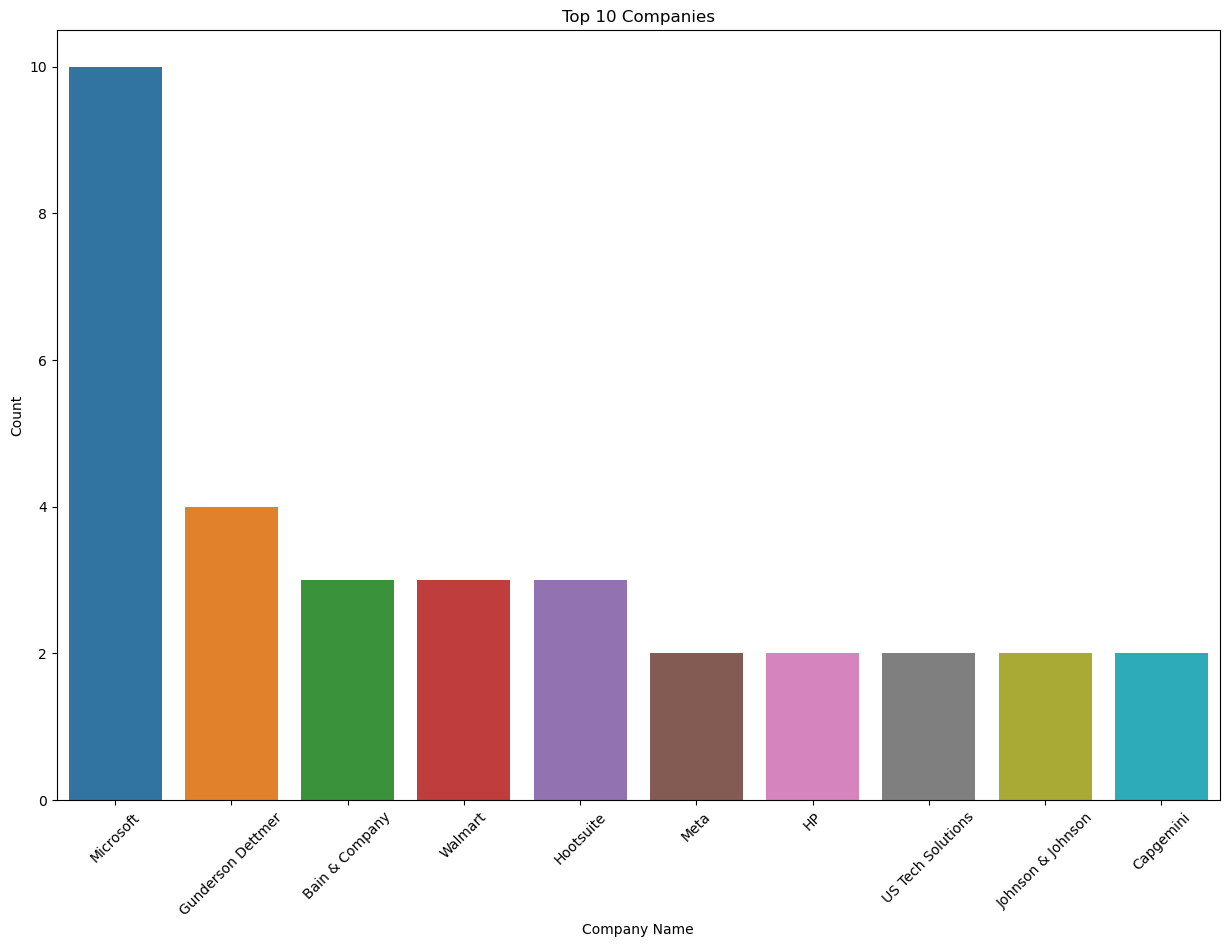

In [25]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Company", data=df, order = df['Company'].value_counts().iloc[:10].index)
plt.title('Top 10 Companies')
plt.xlabel('Company Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [31]:
#Calculating the average of each level entry 
mean_salary = df.groupby("Type")["Salary"].mean().round(2)
def missing_salary(row):
    if pd.isna(row['Salary']):
        return round(mean_salary[row['Type']],2)
    else:
        return round(row['Salary'],2)
df['Salary'] = df.apply(missing_salary, axis=1)
df.head(20)


/var/folders/3_/pk79mcfs66gfn1v4wcqckkj00000gn/T/ipykernel_5745/2544012731.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary'] = df.apply(missing_salary, axis=1)


,Title,Company,Posted,Applicants,Type,Salary,Period,Data Science,Machine Learning,Data Analyst
0,"data scientist, small business group",Meta,1 day ago,77,Not Applicable,169000.00,yearly,True,False,False
3,"data scientist, analytics",DoorDash,NaN,NaN,Entry level,188000.00,yearly,True,False,False
5,data scientist,Walgreens,NaN,170,Not Applicable,119324.07,NaN,True,False,False
6,jr data scientist,EVONA,NaN,NaN,Entry level,110000.00,yearly,True,False,False
7,data science intern,ActiGraph,6 days ago,NaN,Internship,39088.40,NaN,True,False,False
9,data scientist (direct hire),NASA - National Aeronautics and Space Administ...,NaN,96,Entry level,94976.50,yearly,True,False,False
10,data scientist,Visa,6 days ago,NaN,Not Applicable,169200.00,yearly,True,False,False
11,"data science engineer (orlando, fl) - hybrid",Relate Central - IT & Cybersecurity Solutions,NaN,170,Mid-Senior level,118502.52,NaN,True,False,False
13,data scientist,Xcellent Technology Solutions (XTS),NaN,33,Mid-Senior level,118502.52,NaN,True,False,False
15,business intelligence analyst,Carrot Fertility,4 days ago,NaN,Mid-Senior level,100000.00,yearly,False,False,False


In [28]:
df.columns

Index(['Title', 'Company', 'Posted', 'Applicants', 'Type', 'Salary', 'Period',
       'Data Science', 'Machine Learning', 'Data Analyst'],
      dtype='object')